In [1]:
import sys
import os

# Go two levels up from docs/source/ to reach the project root
# sys.path.insert(0, os.path.abspath('../../'))

import ionerdss as ion
import subprocess
from IPython.display import display, Image

Homo 5mer

In [2]:
pdb_id = '8f8p'
save_folder = '~/Documents/8f8p_dir'

pdb_model = ion.PDBModel(pdb_id=pdb_id, save_dir=save_folder)

# set standard_output=True to see the determined interfaces
pdb_model.coarse_grain(distance_cutoff=0.35, 
                       residue_cutoff=3,
                       show_coarse_grained_structure=False, 
                       save_pymol_script=False, 
                       standard_output=True)

Successfully downloaded assembly file: /Users/sikao/Documents/8f8p_dir/8f8p-assembly1.cif.gz
Binding interfaces detected:
Chain A:
  Center of Mass (COM): (138.63644409179688, 154.12098693847656, 219.00856018066406)
  Interfaces: ['B', 'C']
  Interface Coordinates: 
    (133.75579833984375, 141.09860229492188, 211.27639770507812)
    Interface Energy: -0.10
    (143.97813415527344, 154.2287139892578, 196.29736328125)
    Interface Energy: -9.02
Chain B:
  Center of Mass (COM): (134.18763732910156, 123.00177001953125, 191.228515625)
  Interfaces: ['A', 'C', 'D']
  Interface Coordinates: 
    (137.8016815185547, 131.69215393066406, 209.1024932861328)
    Interface Energy: -0.10
    (142.60450744628906, 135.40200805664062, 186.58624267578125)
    Interface Energy: 1.77
    (128.9962921142578, 124.14057159423828, 168.51048278808594)
    Interface Energy: -10.11
Chain C:
  Center of Mass (COM): (145.7298126220703, 152.23406982421875, 163.42855834960938)
  Interfaces: ['A', 'B', 'D', 'E']
  

In [3]:
pdb_model.regularize_homologous_chains(dist_threshold_intra=3.5, 
                                       dist_threshold_inter=3.5, 
                                       angle_threshold=25.0, 
                                       show_coarse_grained_structure=False, 
                                       save_pymol_script=True, 
                                       standard_output=False)

Homologous chains identified using sequence alignment:
{'B': 'A', 'D': 'A', 'E': 'A', 'A': 'A', 'C': 'A'}
Homologous chain groups identified:
[['A', 'B', 'C', 'D', 'E']]
Regularized coarse-grained structure saved to /Users/sikao/Documents/8f8p_dir/regularized_coarse_grained_structure.cif.
PyMOL script saved to /Users/sikao/Documents/8f8p_dir/visualize_regularized_coarse_grained.pml.
Model saved successfully to /Users/sikao/Documents/8f8p_dir/8f8p_model.json


PyMOL>load /Users/sikao/Documents/8f8p_dir/regularized_coarse_grained_structure.cif, coarse_grained
 ExecutiveLoad-Detail: Detected mmCIF
 CmdLoad: "/Users/sikao/Documents/8f8p_dir/regularized_coarse_grained_structure.cif" loaded as "coarse_grained".
PyMOL>hide everything
PyMOL>show spheres, name COM
PyMOL>show spheres, name INT
PyMOL>set sphere_scale, 1.0
 Setting: sphere_scale set to 1.00000.
PyMOL>color red, name COM
 Executive: Colored 5 atoms.
PyMOL>color blue, name INT
 Executive: Colored 14 atoms.
PyMOL>pseudoatom com_A, pos=[138.636, 154.121, 219.009], color=red
 ObjMol: created com_A/PSDO/P/PSD`1 /PS1
PyMOL>pseudoatom int_A_1, pos=[133.756, 141.099, 211.276], color=blue
 ObjMol: created int_A_1/PSDO/P/PSD`1 /PS1
PyMOL>distance line1, com_A, int_A_1
 Executive: object "line1" created.
PyMOL>set dash_width, 4, line1
 Setting: dash_width set to 4.00000 in object "line1".
PyMOL>set dash_gap, 0.5, line1
 Setting: dash_gap set to 0.50000 in object "line1".
PyMOL>pseudoatom int_A_2, 

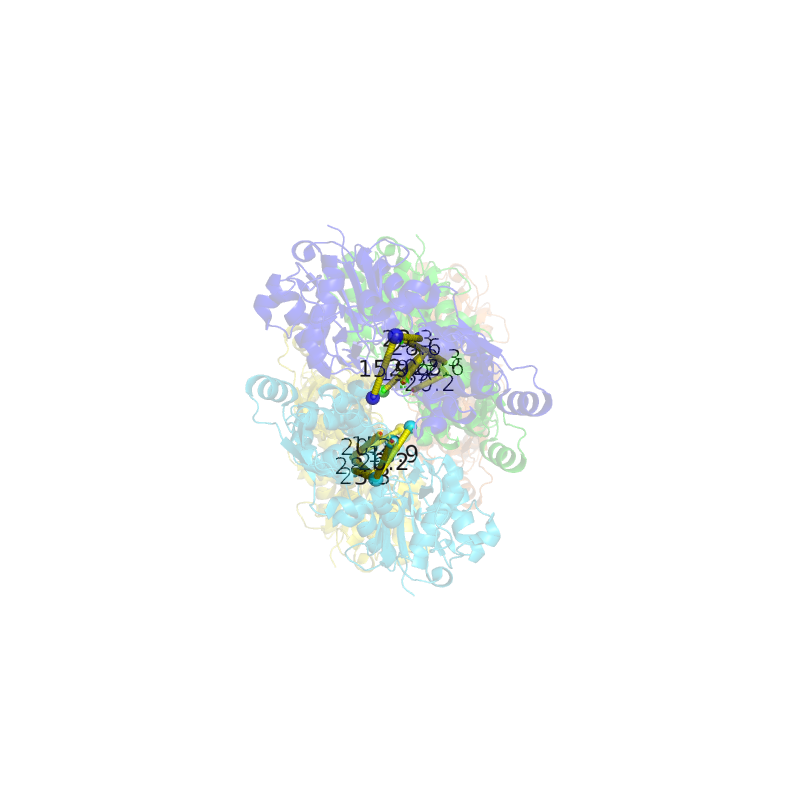

In [4]:
if save_folder.startswith('~'):
    abs_save_folder = os.path.expanduser(save_folder)
abs_save_folder = os.path.abspath(abs_save_folder)

subprocess.run(["pymol", "-cq", f"{abs_save_folder}/visualize_regularized_coarse_grained.pml"], check=True)
display(Image(filename=f"{abs_save_folder}/comparison_regularized.png"))